In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [2]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Read the dataset document (CSV type)
fifa_male = pd.read_csv("fifa21_male2.csv", low_memory = False)

# Source: https://medium.com/data-storytelling/most-interesting-facts-about-fifa-players-from-a-data-scientist-perspective-1e16f2cb33c4
num_rows = fifa_male.shape[0]
num_columns = fifa_male.shape[1]

print("There are {} rows in FIFA dataset".format(num_rows))
print("There are {} columns in FIFA dataset".format(num_columns))

There are 17125 rows in FIFA dataset
There are 107 columns in FIFA dataset


In [3]:
fifa_male.head(50)

ID             Name  Age  OVA            Nationality  \
0      2      G. Pasquale   33   69                  Italy   
1     16      Luis García   37   71                  Spain   
2     27          J. Cole   33   71                England   
3     36         D. Yorke   36   68  Trinidad &amp; Tobago   
4     41          Iniesta   36   81                  Spain   
5     61       D. Odonkor   27   66                Germany   
6     80     E. Belözoğlu   38   77                 Turkey   
7    241         R. Giggs   39   78                  Wales   
8    244    G. Neville  B   35   76                England   
9    246       P. Scholes   37   80                England   
10   249       P. Neville   35   74                England   
11   250       D. Beckham   37   78                England   
12   330         R. Keane   35   80    Republic of Ireland   
13   388      S. Campbell   35   75                England   
14   488          O. Kahn   38   87                Germany   
15   496        D. Hamann   36   61                Germany   
16   570        A. Okocha   33   73                Nigeria   
17   670             Zulu   26   66                 Brazil   
18   684     M. Schwarzer   42   73              Australia   
19   805       J. Lehmann   39   79                Germany   
20  1001        G. Király   39   69                Hungary   
21  1040   Roberto Carlos   38   79                 Brazil   
22  1041       J. Zanetti   39   75              Argentina   
23  1075     A. Del Piero   38   70                  Italy   
24  1088         A. Nesta   37   73                  Italy   
25  1109       P. Maldini   40   77                  Italy   
26  1179        G. Buffon   42   82                  Italy   
27  1183     F. Cannavaro   35   82                  Italy   
28  1186            Couto   37   82               Portugal   
29  1198       F. Inzaghi   37   73                  Italy   
30  1219       C. Abbiati   37   75                  Italy   
31  1222      Marco Paulo   35   61               Portugal   
32  1238         F. Totti   39   80                  Italy   
33  1256       C. Seedorf   37   82            Netherlands   
34  1419        P. Vieira   34   76                 France   
35  1615        L. Thuram   35   83                 France   
36  1625         T. Henry   36   79                 France   
37  1668      C. Makélelé   37   74                 France   
38  1747        G. Coupet   37   75                 France   
39  1845      O. Solskjær   34   75                 Norway   
40  2062        L. Bowyer   34   69                England   
41  2147  M. Stekelenburg   37   72            Netherlands   
42  2148      H. Trabelsi   29   79                Tunisia   
43  2196  R. Weidenfeller   36   75                Germany   
44  2231        E. Heskey   37   66                England   
45  2492           Eliseu   33   76               Portugal   
46  2651         S. Given   40   73    Republic of Ireland   
47  2702       K. Ellison   41   58                England   
48  2837         R. Delap   36   63    Republic of Ireland   
49  2956        S. Petrov   32   76               Bulgaria   

                     Club  BOV   BP      Position  \
0                 Udinese   71  LWB            LM   
1               KAS Eupen   70   CM    CM CAM CDM   
2           Coventry City   71  CAM  CAM RM RW LM   
3              Sunderland   70   ST           NaN   
4             Vissel Kobe   82  CAM        CM CAM   
5        Alemannia Aachen   66   RW         RW RM   
6           Fenerbahçe SK   77   CM        CM CDM   
7       Manchester United   78  CAM     LM CM CAM   
8       Manchester United   78   CB     RB CB RWB   
9       Manchester United   82  CAM        CM CDM   
10                Everton   75   CB     CDM CM RB   
11                    NaN   77   CM         CM RM   
12              LA Galaxy   81   CF            ST   
13       Newcastle United   75   CB           NaN   
14      FC Bayern München   87   GK            G

In [4]:
fifa_male

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  \
0            Udinese   71  LWB            LM   
1          KAS Eupen   70   CM    CM CAM CDM   
2      Coventry City   71  CAM  CAM RM RW LM   
3         Sunderland   70   ST           NaN   
4        Vissel Kobe   82  CAM        CM CAM   
...              ...  ...  ...           ...   
17120     CD Tondela   66   CB            CB   
17121        Burnley   58  CAM        CAM CM   
17122        Burnley   56   RB            RB   
17123  SK Sturm Graz   62   RB         RB LB   
17124          Lecce   61   ST            ST   

                                            Player Photo  ...    CDM    RDM  \
0      https://cdn.sofifa.com/players/000/002/16_120.png  ...  70+-1  70+-1   
1      https://cdn.sofifa.com/players/000/016/19_120.png  ...   66+1   66+1   
2      https://cdn.sofifa.com/players/000/027/16_120.png  ...   54+0   54+0   
3      https://cdn.sofifa.com/players/000/036/09_120.png  ...   65+0   65+0   
4      https://cdn.sofifa.com/players/000/041/20_120.png  ...   73+3   73+3   
...                                                  ...  ...    ...    ...   
17120  https://cdn.sofifa.com/players/259/088/20_120.png  ...   55+2   55+2   
17121  https://cdn.sofifa.com/players/259/090/20_120.png  ...   52+2   52+2   
17122  https://cdn.sofifa.com/players/259/091/20_120.png  ...   50+2   50+2   
17123  https://cdn.sofifa.com/players/259/101/20_120.png  ...   58+2   58+2   
17124  https://cdn.sofifa.com/players/259/105/20_120.png  ...   32+2   32+2   

         RWB     LB   LCB    CB   RCB     RB    GK Gender  
0      71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1       62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2       52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3       56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4       70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  
...      ...    ...   ...   ...   ...    ...   ...    ...  
17120   54+2   57+2  64+2  64+2  64+2   57+2  12+2   Male  
17121   53+2   52+2  49+2  49+2  49+2   52+2  17+2   Male  
17122   54+2   54+2  54+2  54+2  54+2   54+2  14+2   Male  
17123   60+2   60+2  58+2  58+2  58+2   60+2  16+2   Male  
17124   36+2   34+2  30+2  30+2  30+2   34+2  14+2   Male  

[17125 rows x 107 columns]

In [5]:
# we can find many different types of data; categorical variables, numerical variables, even links. 
# But to start analyzing this data and finding possible patterns between the different variables, we first have to CLEAN and SORT

In [6]:
# 1) First of all, we are going to drop (delete) the columns we believe that are not going to be useful for our Data Analysis process
# For instance; player photo, club logo and flag photo (they are unnecesary)
# Also, the dataset indicates that all of the players are Male, so Gender columns is unnecessary too*

In [7]:
# df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

fifa_male.drop(['Player Photo','Club Logo','Flag Photo','Gender'], axis = 1, inplace = True)
fifa_male

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  POT  ...    LDM    CDM    RDM  \
0            Udinese   71  LWB            LM   69  ...  70+-1  70+-1  70+-1   
1          KAS Eupen   70   CM    CM CAM CDM   71  ...   66+1   66+1   66+1   
2      Coventry City   71  CAM  CAM RM RW LM   71  ...   54+0   54+0   54+0   
3         Sunderland   70   ST           NaN   82  ...   65+0   65+0   65+0   
4        Vissel Kobe   82  CAM        CM CAM   81  ...   73+3   73+3   73+3   
...              ...  ...  ...           ...  ...  ...    ...    ...    ...   
17120     CD Tondela   66   CB            CB   69  ...   55+2   55+2   55+2   
17121        Burnley   58  CAM        CAM CM   66  ...   52+2   52+2   52+2   
17122        Burnley   56   RB            RB   67  ...   50+2   50+2   50+2   
17123  SK Sturm Graz   62   RB         RB LB   73  ...   58+2   58+2   58+2   
17124          Lecce   61   ST            ST   74  ...   32+2   32+2   32+2   

         RWB     LB   LCB    CB   RCB     RB    GK  
0      71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0  
1       62+1   60+1  60+1  60+1  60+1   60+1  17+1  
2       52+0   47+0  46+0  46+0  46+0   47+0  15+0  
3       56+0   57+0  51+0  51+0  51+0   57+0  22+0  
4       70+3   67+3  64+3  64+3  64+3   67+3  17+3  
...      ...    ...   ...   ...   ...    ...   ...  
17120   54+2   57+2  64+2  64+2  64+2   57+2  12+2  
17121   53+2   52+2  49+2  49+2  49+2   52+2  17+2  
17122   54+2   54+2  54+2  54+2  54+2   54+2  14+2  
17123   60+2   60+2  58+2  58+2  58+2   60+2  16+2  
17124   36+2   34+2  30+2  30+2  30+2   34+2  14+2  

[17125 rows x 103 columns]

In [8]:
# Moreover, after a time searching, I discovered what the abreviations standed for (lol), which refers to the players position
# For a better understanding, I believe it is better to change to column name abreviation to the extended version
# I will use the RENAME function

In [9]:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
# Is there a faster way?

fifa_male.rename(columns = {'ST':'Striker','CF':'Centre Forward','LF':'Left Forward','RF':'Right Forward','LF':'Left Winger','RF':'Rigth Winger','CAM':'Attacking Midfielder','LM':'Left Midfielder','RM':'Right Midfielder','CM':'Central Midfielder','LWB':'Left Wing Back','CDM':'Deffensive Midfielder','RDM':'Right Defensive Midfielder','LDM':'Left Defensive Midfielder','RWB':'Right Wing Back','LB':'Left Back','RB':'Right Back','CB':'Center Back','RCB':'Right Center Back','LCB':'Left Center Back','GK':'Goalkeeper','CF':'Central Forward','ST':'Striker','POT':'Potential','BP':'Ball Position'})
fifa_male

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  POT  ...    LDM    CDM    RDM  \
0            Udinese   71  LWB            LM   69  ...  70+-1  70+-1  70+-1   
1          KAS Eupen   70   CM    CM CAM CDM   71  ...   66+1   66+1   66+1   
2      Coventry City   71  CAM  CAM RM RW LM   71  ...   54+0   54+0   54+0   
3         Sunderland   70   ST           NaN   82  ...   65+0   65+0   65+0   
4        Vissel Kobe   82  CAM        CM CAM   81  ...   73+3   73+3   73+3   
...              ...  ...  ...           ...  ...  ...    ...    ...    ...   
17120     CD Tondela   66   CB            CB   69  ...   55+2   55+2   55+2   
17121        Burnley   58  CAM        CAM CM   66  ...   52+2   52+2   52+2   
17122        Burnley   56   RB            RB   67  ...   50+2   50+2   50+2   
17123  SK Sturm Graz   62   RB         RB LB   73  ...   58+2   58+2   58+2   
17124          Lecce   61   ST            ST   74  ...   32+2   32+2   32+2   

         RWB     LB   LCB    CB   RCB     RB    GK  
0      71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0  
1       62+1   60+1  60+1  60+1  60+1   60+1  17+1  
2       52+0   47+0  46+0  46+0  46+0   47+0  15+0  
3       56+0   57+0  51+0  51+0  51+0   57+0  22+0  
4       70+3   67+3  64+3  64+3  64+3   67+3  17+3  
...      ...    ...   ...   ...   ...    ...   ...  
17120   54+2   57+2  64+2  64+2  64+2   57+2  12+2  
17121   53+2   52+2  49+2  49+2  49+2   52+2  17+2  
17122   54+2   54+2  54+2  54+2  54+2   54+2  14+2  
17123   60+2   60+2  58+2  58+2  58+2   60+2  16+2  
17124   36+2   34+2  30+2  30+2  30+2   34+2  14+2  

[17125 rows x 103 columns]

In [10]:
# Some questions...

# Null values? (data cleaning)

# Who is the most valuable player?
# Which are the countries that "produce" the best players?
# Best FIFA Teams?
# How do age affect to performance?

In [11]:
fifa_male.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000     33.000000      6.000000      3.000000   
25%        0.000000    232.000000     41.000000     33.000000   
50%        4.000000    271.000000     56.000000     52.000000   
75%        9.000000    306.000000     65.000000     64.000000   
max       26.000000    437.000000     94.000000     95.000000   

       Heading Accuracy  ...  GK Positioning   GK Reflexes   Total Stats  \
count      17125.000000  ...    17125.000000  17125.000000  17125.000000   
mean          53.598832  ...       15.514277     15.738628   1631.256175   
std           16.947164  ...       16.406064     17.130908    260.357024   
min            5.000000  ...        1.000000      1.000000    731.000000   
25%           46.000000  ...        8.000000      8.000000   1492.000000   
50%           57.000000  ...       11.000000     11.000000   1659.000000   
75%           65.000000  ...       14.000000     14.000000   1812.000000   
max           93.000000  ...       93.000000     90.000000   2316.000000   

         Base Stats           PAC           SHO           PAS           DRI  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean     361.372146     68.091620     54.967299     58.926540     64.209869   
std       40.252290     11.147116     13.877605     10.186728      9.832734   
min      228.000000     25.000000     16.000000     25.000000     28.000000   
25%      333.000000     62.000000     46.000000     52.000000     59.000000   
50%      362.000000     69.000000     58.000000     60.000000     65.000000   
75%      390.000000     75.000000     65.000000     66.000000     71.000000   
max      498.000000     96.000000     93.000000     93.000000     95.000000   

                DEF           PHY  
count  17125.000000  17125.000000  
mean      50.266102     64.910715  
std       16.853801      9.660260  
min       12.000000     27.000000  
25%       35.000000     59.000000  
50%       53.000000     66.000000  
75%       64.000000     72.000000  
max       91.000000     93.000000  

[8 rows x 55 columns]

In [12]:
# I have seen there are some NaaN values (null), but not many. Lets see it the other way around, how many columns do NOT have null values?

In [13]:
fifa_male.isnull()

ID   Name    Age    OVA  Nationality   Club    BOV     BP  Position  \
0      False  False  False  False        False  False  False  False     False   
1      False  False  False  False        False  False  False  False     False   
2      False  False  False  False        False  False  False  False     False   
3      False  False  False  False        False  False  False  False      True   
4      False  False  False  False        False  False  False  False     False   
...      ...    ...    ...    ...          ...    ...    ...    ...       ...   
17120  False  False  False  False        False  False  False  False     False   
17121  False  False  False  False        False  False  False  False     False   
17122  False  False  False  False        False  False  False  False     False   
17123  False  False  False  False        False  False  False  False     False   
17124  False  False  False  False        False  False  False  False     False   

         POT  ...    LDM    CDM    RDM    RWB     LB    LCB     CB    RCB  \
0      False  ...  False  False  False  False  False  False  False  False   
1      False  ...  False  False  False  False  False  False  False  False   
2      False  ...  False  False  False  False  False  False  False  False   
3      False  ...  False  False  False  False  False  False  False  False   
4      False  ...  False  False  False  False  False  False  False  False   
...      ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
17120  False  ...  False  False  False  False  False  False  False  False   
17121  False  ...  False  False  False  False  False  False  False  False   
17122  False  ...  False  False  False  False  False  False  False  False   
17123  False  ...  False  False  False  False  False  False  False  False   
17124  False  ...  False  False  False  False  False  False  False  False   

          RB     GK  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
17120  False  False  
17121  False  False  
17122  False  False  
17123  False  False  
17124  False  False  

[17125 rows x 103 columns]

In [14]:
fifa_male.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
LCB            0
CB             0
RCB            0
RB             0
GK             0
Length: 103, dtype: int64

In [15]:
# At first sight, we can see there are VERY LITTLE/Almost Zero null values
fifa_male.isnull().sum().sum()   # So we have 17k null values, but out of almost 2 million values (not even a 1%)

17730

In [16]:
# Still, lets drop the columns with high number of null values

fifa_male[fifa_male.columns[fifa_male.isnull().mean() > 0.8]]

Loan Date End
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
...             ...
17120  Jun 30, 2021
17121           NaN
17122           NaN
17123           NaN
17124           NaN

[17125 rows x 1 columns]

In [17]:
# 'Loan Date End' has more than an 80% of null values, so we drop this column
fifa_male.drop(['Loan Date End'], axis = 1, inplace = True)
fifa_male

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  POT  ...    LDM    CDM    RDM  \
0            Udinese   71  LWB            LM   69  ...  70+-1  70+-1  70+-1   
1          KAS Eupen   70   CM    CM CAM CDM   71  ...   66+1   66+1   66+1   
2      Coventry City   71  CAM  CAM RM RW LM   71  ...   54+0   54+0   54+0   
3         Sunderland   70   ST           NaN   82  ...   65+0   65+0   65+0   
4        Vissel Kobe   82  CAM        CM CAM   81  ...   73+3   73+3   73+3   
...              ...  ...  ...           ...  ...  ...    ...    ...    ...   
17120     CD Tondela   66   CB            CB   69  ...   55+2   55+2   55+2   
17121        Burnley   58  CAM        CAM CM   66  ...   52+2   52+2   52+2   
17122        Burnley   56   RB            RB   67  ...   50+2   50+2   50+2   
17123  SK Sturm Graz   62   RB         RB LB   73  ...   58+2   58+2   58+2   
17124          Lecce   61   ST            ST   74  ...   32+2   32+2   32+2   

         RWB     LB   LCB    CB   RCB     RB    GK  
0      71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0  
1       62+1   60+1  60+1  60+1  60+1   60+1  17+1  
2       52+0   47+0  46+0  46+0  46+0   47+0  15+0  
3       56+0   57+0  51+0  51+0  51+0   57+0  22+0  
4       70+3   67+3  64+3  64+3  64+3   67+3  17+3  
...      ...    ...   ...   ...   ...    ...   ...  
17120   54+2   57+2  64+2  64+2  64+2   57+2  12+2  
17121   53+2   52+2  49+2  49+2  49+2   52+2  17+2  
17122   54+2   54+2  54+2  54+2  54+2   54+2  14+2  
17123   60+2   60+2  58+2  58+2  58+2   60+2  16+2  
17124   36+2   34+2  30+2  30+2  30+2   34+2  14+2  

[17125 rows x 102 columns]

In [18]:
# Some more insights before preparing Data?
# What is the age of the oldest/youngest player?

print(fifa_male['Age'].min())
print(fifa_male['Age'].max())

16
53


In [19]:
# Wow!! 16 years old is pretty young, who is it?
fifa_male_age = fifa_male.sort_values('Age')
fifa_male_age[['Name','Club','Position']]

# So Gulliksen (Norway) is the youngest player, and K. Miura (Japan) is the oldest player

Name                    Club   Position
13850         T. Gulliksen         Strømsgodset IF         CM
15594            D. Rivera  New England Revolution         LW
12675       César Gelabert             Real Madrid  CAM LM ST
13280            J. Crilly          Bray Wanderers      CB LB
15374  R. Borges Rodrigues       Melbourne City FC     CAM ST
...                    ...                     ...        ...
548           F. Mondragón                Colombia        NaN
5062          H. Sulaimani                 Al Ahli         LB
1072             L. Butrón            Alianza Lima         GK
277               S. Royce              Gillingham         GK
15737             K. Miura             Yokohama FC         ST

[17125 rows x 3 columns]

In [20]:
# Lowest/Highest Overall Player Score?

print(fifa_male['OVA'].min())
print(fifa_male['OVA'].max())

print(fifa_male['OVA'].mean()) # on average?

38
93
66.96502189781022


In [21]:
# Okay.. who are them?
fifa_male_OVA = fifa_male.sort_values(['OVA'],ascending = [False]).head(100)
fifa_male_OVA[['Name','OVA','Club','Position']].head(3) # This is really useful

Name  OVA             Club  Position
752            L. Messi   93     FC Barcelona  RW ST CF
142   Cristiano Ronaldo   92         Juventus     ST LW
2871       K. De Bruyne   91  Manchester City    CAM CM

In [22]:
# More insights: Player with lowest OVA is L. Ferrari (Italy), and player with highest OVA L. Messi (Argentina)
# Could they be considered best and worst players at the moment? - Not really, how long have they been playing? 
# Messi is 33 vs Ferrari 21

In [23]:
# Lowest/Highest potential?

print(fifa_male['POT'].min())
print(fifa_male['POT'].max())  # Lets see...

47
95


In [24]:
fifa_male_POT = fifa_male.sort_values('POT')
fifa_male_POT[['Name','POT','Club','Position']]

Name  POT                   Club   Position
16705       Song Yue   47        Tianjin TEDA FC         CM
277         S. Royce   48             Gillingham         GK
1872       L. Walker   48     Milton Keynes Dons         GK
16630   Wang Jianwen   48  Qingdao Huanghai F.C.         CM
16045      Gao Xiang   49  Qingdao Huanghai F.C.         RW
...              ...  ...                    ...        ...
10354     K. Havertz   93                Chelsea  CAM RM CF
12361     João Félix   93        Atlético Madrid      CF ST
11207   Vinícius Jr.   93            Real Madrid         LW
2790   M. ter Stegen   93           FC Barcelona         GK
9331       K. Mbappé   95    Paris Saint-Germain   ST LW RW

[17125 rows x 4 columns]

In [25]:
# Killian Mbappe has the highest potential vs Song Yue with the lowest. It strikes me that the 5 playes with least potential are mainly from China and England

In [26]:
# Lets get started with a little analysis. What correlation is there between some variables? For instance, Age and Potential?

In [33]:
np.corrcoef(fifa_male['Age'], fifa_male['POT'])

array([[ 1.        , -0.23761944],
       [-0.23761944,  1.        ]])

In [31]:
np.corrcoef(fifa_male['Age'], fifa_male['OVA'])

array([[1.        , 0.51709898],
       [0.51709898, 1.        ]])

C:\Users\Angela\AppData\Local\Temp\ipykernel_22324\214133552.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(fifa_male.corr(), dtype=np.bool))


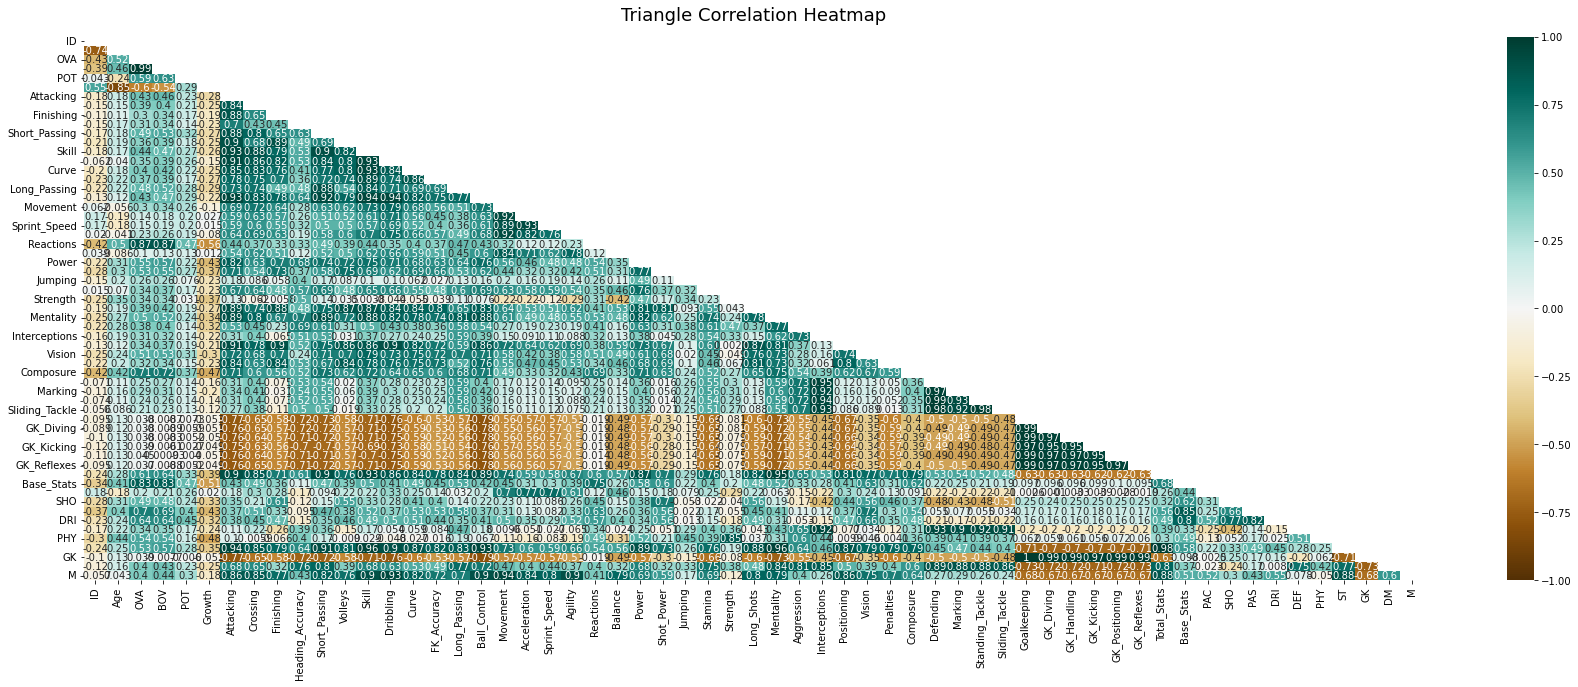

In [63]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

fifa_male.corr()

plt.figure(figsize=(30, 10))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(fifa_male.corr(), dtype=np.bool))
heatmap = sns.heatmap(fifa_male.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [25]:
# We can see there is a negative correlation; the higher the age, the lower the potential and viceversa
fifa_male[['Name','Age', 'POT']].sort_values('Age') # The youngest players have, on average, higher potential than the mean

Name  Age  POT
13850         T. Gulliksen   16   76
15594            D. Rivera   16   76
12675       César Gelabert   16   82
13280            J. Crilly   16   67
15374  R. Borges Rodrigues   16   71
...                    ...  ...  ...
548           F. Mondragón   42   72
5062          H. Sulaimani   43   64
1072             L. Butrón   43   64
277               S. Royce   47   48
15737             K. Miura   53   59

[17125 rows x 3 columns]

In [26]:
fifa_male['POT'].mean() # This proves that the age really influences the potential

72.4898102189781

<AxesSubplot:>

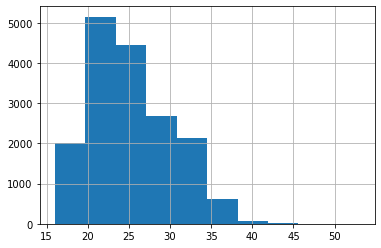

In [27]:
# Lets represent the Age. It is known that the Age range is not really big when talking about football, but still, lets see if there are some weird behaviours...
# Do players performs well at a certain age?

fifa_male['Age'].describe()
fifa_male['Age'].hist() # So we can see that most of the football players are between 20-25 years old, and there are some exceptional values (from 40 to 50 years)

<AxesSubplot:xlabel='Age', ylabel='count'>

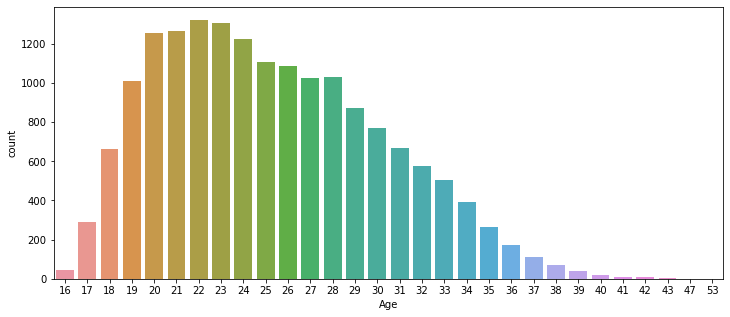

In [28]:
# But this graph is really poor and boring, lets make it cooler with Seaborn

plt.figure(figsize = (12,5))
sns.countplot(x = "Age", data = fifa_male)

<AxesSubplot:xlabel='OVA', ylabel='count'>

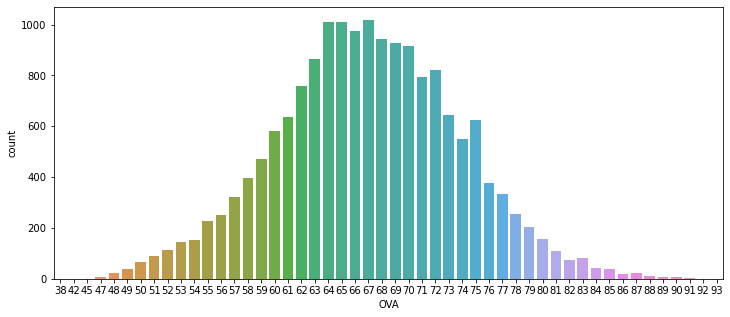

In [34]:
plt.figure(figsize = (12,5))
sns.countplot(x = "OVA", data = fifa_male)

In [29]:
# Another relevant insight is that number of players the number of players is significantly reduced when they reach the age of 27 
# From that age the number of players decreases much faster

fifa_male.loc[(fifa_male['Age'] == 27 )]

ID         Name  Age  OVA           Nationality  \
5          61   D. Odonkor   27   66               Germany   
369    122428   N. Belhadj   27   75               Algeria   
579    146947        Vesga   27   75                 Spain   
933    164827    S. Holden   27   72         United States   
1039   167963     Anderson   27   73                Brazil   
...       ...          ...  ...  ...                   ...   
16593  257550  I. Al Kaabi   27   59  United Arab Emirates   
16674  257863      C. Hall   27   60               England   
16702  257924     B. Letić   27   66    Bosnia Herzegovina   
16816  258332      M. Hybš   27   70        Czech Republic   
17081  258958  O. Filippov   27   69               Ukraine   

                          Club  BOV   BP    Position  POT  ...   LDM   CDM  \
5             Alemannia Aachen   66   RW       RW RM   70  ...  47+0  47+0   
369                 Portsmouth   77   CF         NaN   82  ...  74+0  74+0   
579    Athletic Club de Bilbao   77  CDM          CM   76  ...  76+0  76+0   
933           Bolton Wanderers   76   RM         NaN   74  ...  72+0  72+0   
1039             Internacional   75  CAM  CM CAM CDM   73  ...  70+0  70+0   
...                        ...  ...  ...         ...  ...  ...   ...   ...   
16593                      NaN   59   GK          GK   62  ...  20+2  20+2   
16674           Harrogate Town   62   CB          CB   62  ...  53+2  53+2   
16702              CD Mirandés   66   LB       LB LM   67  ...  60+2  60+2   
16816           Viktoria Plzeň   70   LB          LB   71  ...  67+2  67+2   
17081        Sint-Truidense VV   69   ST          ST   69  ...  42+2  42+2   

        RDM   RWB    LB   LCB    CB   RCB    RB    GK  
5      47+0  50+0  46+0  41+0  41+0  41+0  46+0  13+0  
369    74+0  77+0  74+0  75+0  75+0  75+0  74+0  25+0  
579    76+0  71+2  71+2  73+2  73+2  73+2  71+2  18+2  
933    72+0  73+0  70+0  67+0  67+0  67+0  70+0  13+0  
1039   70+0  69+0  69+0  69+0  69+0  69+0  69+0  18+0  
...     ...   ...   ...   ...   ...   ...   ...   ...  
16593  20+2  20+2  19+2  20+2  20+2  20+2  19+2  58+2  
16674  53+2  51+2  54+2  60+2  60+2  60+2  54+2  16+2  
16702  60+2  65+2  64+2  62+2  62+2  62+2  64+2  17+2  
16816  67+2  68+2  68+2  67+2  67+2  67+2  68+2  16+2  
17081  42+2  44+2  42+2  38+2  38+2  38+2  42+2  14+2  

[1026 rows x 102 columns]

In [30]:
# In the analysis part, this data could be treated differently

fifa_male_age = fifa_male[fifa_male['Age']>27].copy()
fifa_male['Age'].sort_values(ascending=False)[:100]

15737    53
277      47
1072     43
5062     43
15576    42
         ..
170      38
176      38
1087     38
1755     38
1738     38
Name: Age, Length: 100, dtype: int64

<AxesSubplot:xlabel='POT', ylabel='count'>

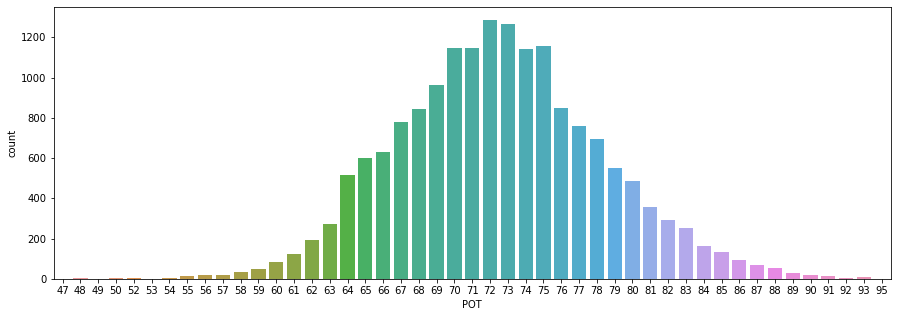

In [31]:
plt.figure(figsize = (15,5))
sns.countplot(x = "POT", data= fifa_male) #Average potential is around 75 points

<AxesSubplot:xlabel='count', ylabel='Nationality'>

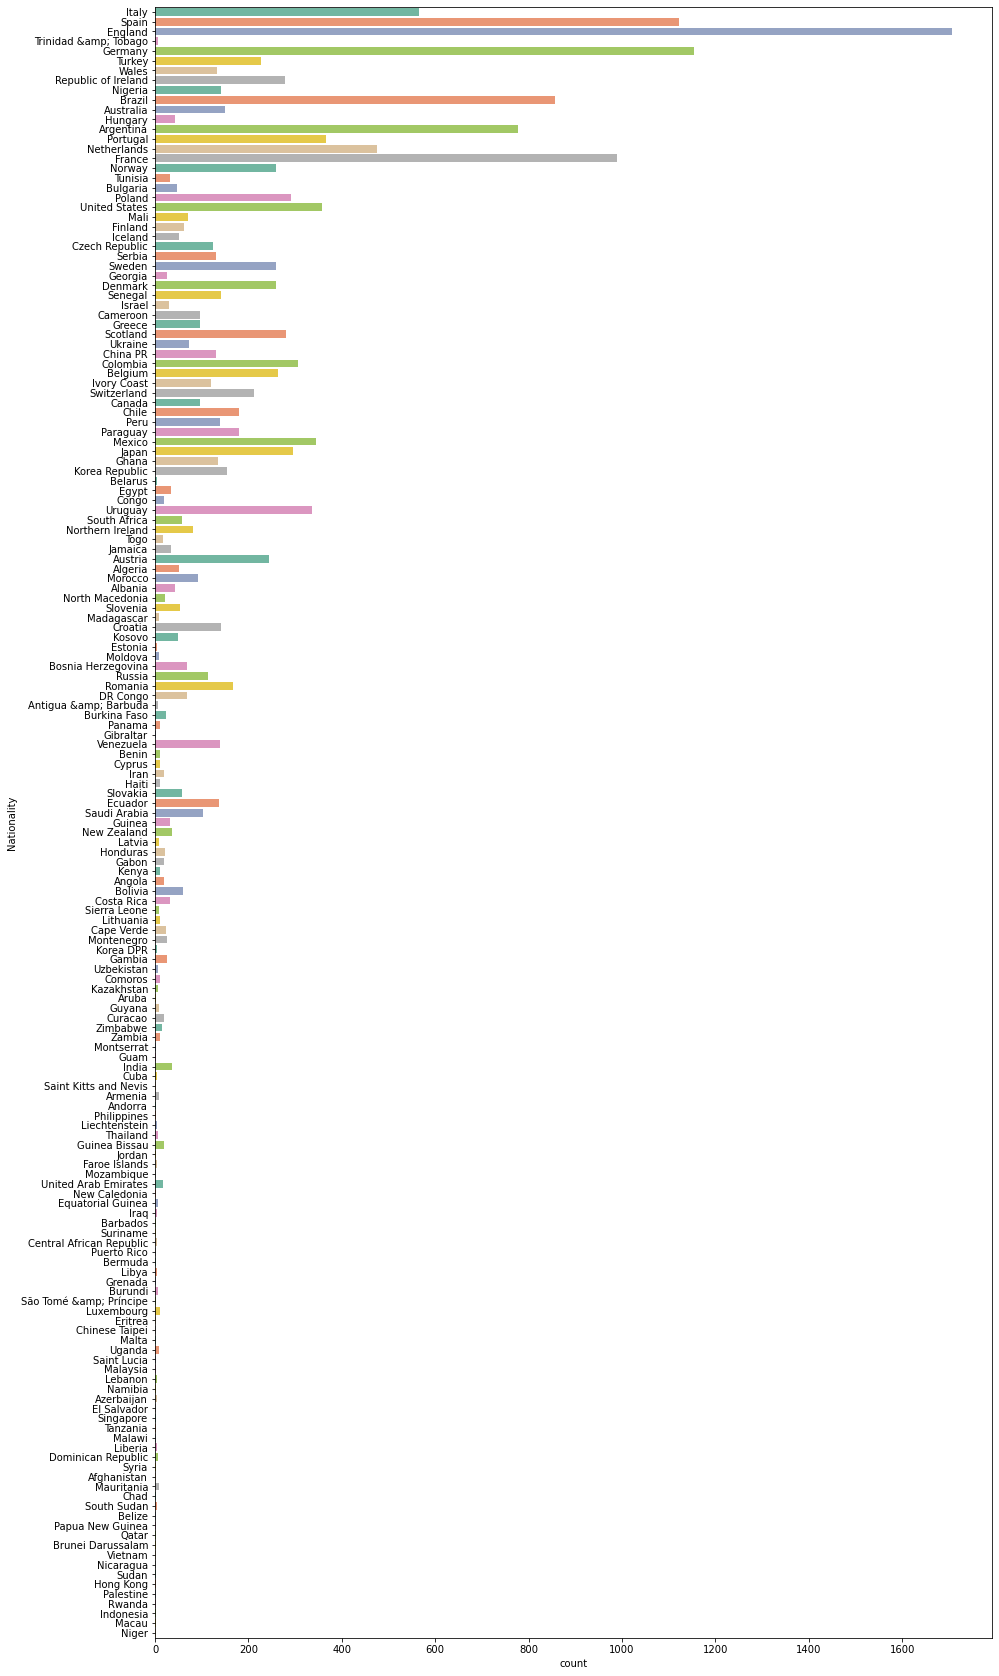

In [32]:
# Where are most players from? Source: https://www.edureka.co/blog/football-world-cup-best-xi-analysis-using-python/
# Which are the countries that produce best FIFA players?

plt.figure(figsize = (15,30))
sns.countplot(y = fifa_male.Nationality, palette = "Set2") # Plot all the nations on Y Axis

In [33]:
# Clearly, most of the players are from England! (Nationality, not teams)
# Also, we can conclude that there are countries with a very very few number of players
# Observations England has the highest number of players in FIFA 21 game. Why? 
# One of the major reasons in this regards is due to the EA franchise, which has predominatingly most user base in UK. Also in FIFA, English League has the most number of teams- generating the most number of players

In [34]:
fifa_England = fifa_male.loc[(fifa_male['Nationality'] ==  'England')]
fifa_England

ID           Name  Age  OVA Nationality                    Club  \
2          27        J. Cole   33   71     England           Coventry City   
8         244  G. Neville  B   35   76     England       Manchester United   
9         246     P. Scholes   37   80     England       Manchester United   
10        249     P. Neville   35   74     England                 Everton   
11        250     D. Beckham   37   78     England                     NaN   
...       ...            ...  ...  ...         ...                     ...   
17056  258904    J. Flanagan   17   55     England        Northampton Town   
17095  259031       L. Delap   17   61     England         Manchester City   
17096  259032       T. Jenks   18   54     England  Brighton & Hove Albion   
17105  259063      R. Fenlon   18   53     England      Accrington Stanley   
17122  259091     C. Barrett   18   56     England                 Burnley   

       BOV   BP      Position  POT  ...   LDM   CDM   RDM   RWB    LB    LCB  \
2       71  CAM  CAM RM RW LM   71  ...  54+0  54+0  54+0  52+0  47+0   46+0   
8       78   CB     RB CB RWB   82  ...  74+0  74+0  74+0  73+0  76+0   78+0   
9       82  CAM        CM CDM   80  ...  75+0  75+0  75+0  67+0  64+0   64+0   
10      75   CB     CDM CM RB   74  ...  74+0  74+0  74+0  72+0  73+0  75+-1   
11      77   CM         CM RM   78  ...  73+1  73+1  73+1  67+1  63+1   59+1   
...    ...  ...           ...  ...  ...   ...   ...   ...   ...   ...    ...   
17056   57   CB            CB   69  ...  51+2  51+2  51+2  50+2  51+2   55+2   
17095   63   ST            ST   82  ...  38+2  38+2  38+2  42+2  40+2   35+2   
17096   59   CB            CM   71  ...  56+2  56+2  56+2  55+2  55+2   57+2   
17105   59   RM            CM   70  ...  48+2  48+2  48+2  51+2  49+2   43+2   
17122   56   RB            RB   67  ...  50+2  50+2  50+2  54+2  54+2   54+2   

          CB    RCB    RB    GK  
2       46+0   46+0  47+0  15+0  
8       78+0   78+0  76+0  13+0  
9       64+0   64+0  64+0  15+0  
10     75+-1  75+-1  73+0  12+0  
11      59+1   59+1  63+1  15+1  
...      ...    ...   ...   ...  
17056   55+2   55+2  51+2  15+2  
17095   35+2   35+2  40+2  14+2  
17096   57+2   57+2  55+2  16+2  
17105   43+2   43+2  49+2  17+2  
17122   54+2   54+2  54+2  14+2  

[1707 rows x 102 columns]

In [35]:
# But we want just the best players...
fifa_England_top = fifa_England.loc[(fifa_England['OVA'] > 80)]
fifa_England_top

ID                 Name  Age  OVA Nationality               Club  \
122    13743           S. Gerrard   36   81     England          LA Galaxy   
232    50752              L. King   30   82     England  Tottenham Hotspur   
1869  183711         J. Henderson   30   86     England          Liverpool   
2071  186345          K. Trippier   29   83     England    Atlético Madrid   
2264  188377            K. Walker   30   85     England    Manchester City   
3961  202126              H. Kane   26   88     England  Tottenham Hotspur   
4049  202652          R. Sterling   25   88     England    Manchester City   
4139  203263           H. Maguire   27   82     England  Manchester United   
4244  203841              N. Pope   28   82     England            Burnley   
4458  204935          J. Pickford   26   81     England            Everton   
4648  205988              L. Shaw   24   81     England  Manchester United   
5046  208830             J. Vardy   33   86     England     Leicester City   
5426  211117              D. Alli   24   83     England  Tottenham Hotspur   
6896  220697          J. Maddison   23   81     England     Leicester City   
7785  225100             J. Gomez   23   83     England          Liverpool   
8785  229880       A. Wan-Bissaka   22   83     England  Manchester United   
8821  229984          B. Chilwell   23   81     England            Chelsea   
9212  231281  T. Alexander-Arnold   21   87     England          Liverpool   
9317  231677          M. Rashford   22   85     England  Manchester United   
9633  233049            J. Sancho   20   87     England  Borussia Dortmund   

      BOV   BP   Position  POT  ...   LDM   CDM   RDM   RWB    LB   LCB    CB  \
122    79   CM     CM CDM   81  ...  75+2  75+2  75+2  72+2  71+2  72+2  72+2   
232    81   CB        NaN   82  ...  72+1  72+1  72+1  65+1  71+1  81+1  81+1   
1869   86  CDM     CDM CM   86  ...  85+1  85+1  85+1  82+2  81+2  80+2  80+2   
2071   83   RB         RB   83  ...  80+2  80+2  80+2  81+2  80+2  77+2  77+2   
2264   85   RB         RB   85  ...  80+3  80+3  80+3  83+2  83+2  80+3  80+3   
3961   88   ST         ST   89  ...  66+3  66+3  66+3  65+3  62+3  61+3  61+3   
4049   88   LW      LW RW   90  ...  64+3  64+3  64+3  69+3  65+3  55+3  55+3   
4139   84   CB         CB   85  ...  80+2  80+2  80+2  73+2  74+2  82+2  82+2   
4244   82   GK         GK   83  ...  31+2  31+2  31+2  28+2  27+2  29+2  29+2   
4458   81   GK         GK   84  ...  41+2  41+2  41+2  34+2  33+2  34+2  34+2   
4648   81   LB         LB   83  ...  78+2  78+2  78+2  78+2  79+2  79+2  79+2   
5046   86   ST         ST   86  ...  64+3  64+3  64+3  68+3  67+3  64+3  64+3   
5426   86  CAM     CAM CM   87  ...  78+3  78+3  78+3  76+3  74+3  74+3  74+3   
6896   83  CAM  CAM CM LW   85  ...  68+2  68+2  68+2  68+2  64+2  56+2  56+2   
7785   84   CB         CB   88  ...  78+2  78+2  78+2  79+2  80+2  82+2  82+2   
8785   83   RB     RB RWB   88  ...  77+2  77+2  77+2  81+2  81+2  79+2  79+2   
8821   81   LB         LB   85  ...  77+2  77+2  77+2  79+2  79+2  76+2  76+2   
9212   87   RB         RB   92  ...  83+2  83+2  83+2  84+2  83+2  78+2  78+2   
9317   86   RM      LM ST   91  ...  65+2  65+2  65+2  68+2  64+2  57+2  57+2   
9633   89  CAM  RM LM CAM   93  ...  62+3  62+3  62+3  66+3  61+3  49+3  49+3   

       RCB    RB    GK  
122   72+2  71+2  19+2  
232   81+1  71+1  15+1  
1869  80+2  81+2  19+2  
2071  77+2  80+2  19+2  
2264  80+3  83+2  19+3  
3961  61+3  62+3  19+3  
4049  55+3  65+3  21+3  
4139  82+2  74+2  21+2  
4244  29+2  27+2  81+2  
4458  34+2  33+2  80+2  
4648  79+2  79+2  17+2  
5046  64+3  67+3  22+3  
5426  74+3  74+3  16+3  
6896  56+2  64+2  20+2  
7785  82+2  80+2  17+2  
8785  79+2  81+2  16+2  
8821  76+2  79+2  17+2  
9212  78+2  83+2  19+2  
9317  57+2  64+2  18+2  
9633  49+3  61+3  19+3  

[20 rows x 102 columns]

<AxesSubplot:xlabel='Age', ylabel='OVA'>

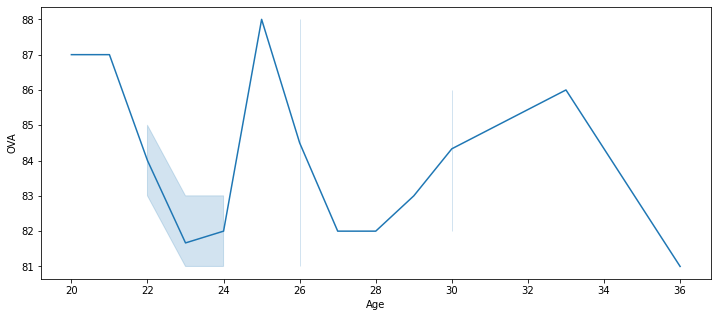

In [36]:
# Lets see it graphically

plt.figure(figsize = (12,5))
sns.lineplot(data = fifa_England_top, x = "Age", y = "OVA" ) # We can see three drastically falls, at 23, 27 and from 36 years old onwards

In [37]:
# So until now we have looking at right side variables (Age, Nationality, and so on). But lets start talking about numbers!
# Who are the best PLAYERS? We have many different classifications according to the player role
# For instance, who is the best GOALKEEPER...?

In [38]:
# BEST PLAYERS:

# Are these players of a certain nationality?
# Are these players of a certain height and weight?
# Are the best players the players with a strong work rate?
# Do the reputation and ratings of the players correlate strongly with the overall performance?

In [10]:
# lETS FIND THE TOP 20 BEST PLAYERS (Based on their Overall Range). Source: Kaggle

top_20 = fifa_male.nlargest(100, 'OVA')
top_20[['Name','OVA','Club','Position','Value','Age']]

Name  OVA                      Club   Position    Value  \
752              L. Messi   93              FC Barcelona   RW ST CF   €67.5M   
142     Cristiano Ronaldo   92                  Juventus      ST LW     €46M   
2287       R. Lewandowski   91         FC Bayern München         ST     €80M   
2650            Neymar Jr   91       Paris Saint-Germain     LW CAM     €90M   
2871         K. De Bruyne   91           Manchester City     CAM CM     €87M   
3665             J. Oblak   91           Atlético Madrid         GK     €75M   
2790        M. ter Stegen   90              FC Barcelona         GK   €69.5M   
4166          V. van Dijk   90                 Liverpool         CB   €75.5M   
5030              S. Mané   90                 Liverpool         LW     €78M   
5109             M. Salah   90                 Liverpool         RW     €78M   
5777              Alisson   90                 Liverpool         GK   €62.5M   
9331            K. Mbappé   90       Paris Saint-Germain   ST LW RW  €105.5M   
662             S. Agüero   89           Manchester City         ST     €53M   
681          Sergio Ramos   89               Real Madrid         CB   €24.5M   
946            K. Benzema   89               Real Madrid      CF ST     €53M   
1010             M. Neuer   89         FC Bayern München         GK     €29M   
2745          T. Courtois   89               Real Madrid         GK     €56M   
3630             Casemiro   89               Real Madrid        CDM   €59.5M   
366               P. Lahm   88         FC Bayern München  RB CDM CM   €29.5M   
850         S. Handanovič   88                     Inter         GK     €16M   
1753             T. Kroos   88               Real Madrid         CM     €55M   
1800            E. Hazard   88               Real Madrid      LW ST     €58M   
3771         K. Koulibaly   88                    Napoli         CB     €50M   
3961              H. Kane   88         Tottenham Hotspur         ST     €71M   
4049          R. Sterling   88           Manchester City      LW RW   €72.5M   
5256              Ederson   88           Manchester City         GK   €53.5M   
5425            P. Dybala   88                  Juventus     CF CAM     €71M   
5736           J. Kimmich   88         FC Bayern München     CDM RB     €65M   
6333             N. Kanté   88                   Chelsea     CDM CM     €51M   
14                O. Kahn   87         FC Bayern München         GK       €0   
458          G. Chiellini   87                  Juventus         CB   €15.5M   
1037            H. Lloris   87         Tottenham Hotspur         GK     €27M   
1373            L. Suárez   87           Atlético Madrid         ST   €31.5M   
1411            L. Modrić   87               Real Madrid         CM   €24.5M   
1425       H. de Noteboom   87               Netherlands         ST       €0   
1427           B. Ronhaar   87               Netherlands         LW       €0   
1892          A. Di María   87       Paris Saint-Germain      RW LW     €39M   
2058          W. Szczęsny   87                  Juventus         GK     €34M   
2290        P. Aubameyang   87                   Arsenal      ST LW     €45M   
2435      Sergio Busquets   87              FC Barcelona        CDM     €38M   
2787          C. Immobile   87                     Lazio         ST   €48.5M   
2878             K. Navas   87       Paris Saint-Germain         GK     €27M   
3102         A. Griezmann   87              FC Barcelona   ST CF LW   €50.5M   
3619               H. Son   87         Tottenham Hotspur      LM CF   €52.5M   
3914      Roberto Firmino   87                 Liverpool         CF     €52M   
5136              Fabinho   87                 Liverpool        CDM   €54.5M   
5633      Bruno Fernandes   87         Manchester United     CAM CM     €63M   
5642           A. Laporte   87           Manchester City         CB     €56M   
6387         A. Robertson   87                 Liverpool         LB     €53M   
6605       Bernardo S

In [40]:
# We got some interesting insights here...
# 1) The most VALUED player is (in terms of OVA) L. Messi, which plays at FC Barcelona, so this spanish team has the most 
# valued player in the world (in the year 2021)
# We could analyze FC Barcelona in depth
# 2) The most VALUED goalkeeper is J. Oblak (Slovenian), who plays at Atletico de Madrid 

In [41]:
# The most important futbol positions are the following: Goalkeepers, Defenders, Midfielders and Forwards.
# Lets find our who is the best one in each group and how does numerical values influence them (for instance, weight or height)

In [42]:
# First of all, replace the " " by "-" in columns
# remove special character
fifa_male.columns = fifa_male.columns.str.replace(' ', '_')
  
# print file after removing special character
print("\n\n", fifa_male)



            ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  POT  ...    LDM    CDM    RDM  \
0            Udinese   71  LWB            LM   69  ...  70+-1  70+-1  70+-1   
1          KAS Eupen   70   CM    

In [43]:
fifa_male.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position  POT  ...    LDM    CDM    RDM    RWB     LB   LCB    CB  \
0            LM   69  ...  70+-1  70+-1  70+-1  71+-2  70+-1  69+0  69+0   
1    CM CAM CDM   71  ...   66+1   66+1   66+1   62+1   60+1  60+1  60+1   
2  CAM RM RW LM   71  ...   54+0   54+0   54+0   52+0   47+0  46+0  46+0   
3           NaN   82  ...   65+0   65+0   65+0   56+0   57+0  51+0  51+0   
4        CM CAM   81  ...   73+3   73+3   73+3   70+3   67+3  64+3  64+3   

    RCB     RB    GK  
0  69+0  70+-1  17+0  
1  60+1   60+1  17+1  
2  46+0   47+0  15+0  
3  51+0   57+0  22+0  
4  64+3   67+3  17+3  

[5 rows x 102 columns]

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


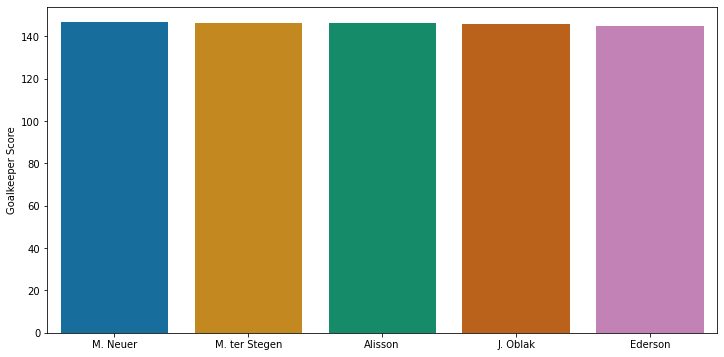

In [45]:
# Goalkeepers - assign a weight to each required skill for each player, and plot it
# Weights - We give all the same weight (You are not a Football Professional)
a = 1

fifa_male['GK'] = (fifa_male.Goalkeeping * a + fifa_male.GK_Diving * a + fifa_male.GK_Handling * a + fifa_male.GK_Kicking 
                   * a + fifa_male.GK_Positioning * a + fifa_male.GK_Reflexes * a)/((6*a))

# Plot and sequential data generation
plt.figure(figsize = (12,6))
sd = fifa_male.sort_values('GK', ascending = False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['GK']))

sns.barplot(x1, y1, palette = 'colorblind')
plt.ylabel("Goalkeeper Score")
plt.show() # So, the best Overall goalkeeper for 2021 FIFA is Neuer

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


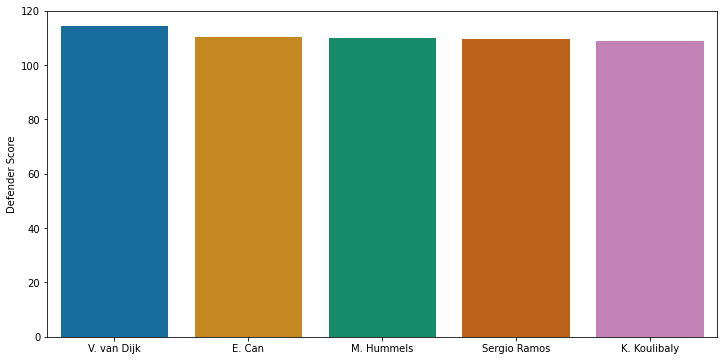

In [50]:
# Defenders - assign a weight to each required skill for each player, and plot it
# Weights
a = 1

fifa_male['DM'] = (fifa_male.Heading_Accuracy * a + fifa_male.Sprint_Speed * a + fifa_male.Strength * a + fifa_male.Long_Passing * a + fifa_male.Defending * a + fifa_male.Dribbling * a)/((6*a))

# Plot and sequential data generation
plt.figure(figsize = (12,6))
sd = fifa_male.sort_values('DM', ascending = False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['DM']))

sns.barplot(x1, y1, palette = 'colorblind')
plt.ylabel("Defender Score")
plt.show() # So, the best Overall Defender for 2021 FIFA is V. van Dijk

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


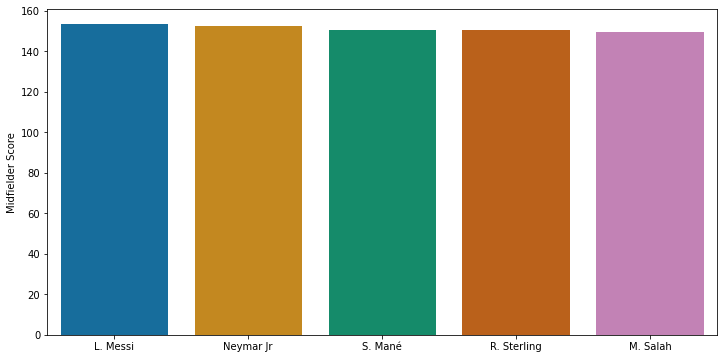

In [47]:
# Midfielder - assign a weight to each required skill for each player, and plot it
# Weights
a = 1

fifa_male['M'] = (fifa_male.Ball_Control * a + fifa_male.Short_Passing * a + fifa_male.Agility * a + fifa_male.Vision * a + fifa_male.Dribbling * a + fifa_male.Movement * a)/((6*a))

# Plot and sequential data generation
plt.figure(figsize = (12,6))
sd = fifa_male.sort_values('M', ascending = False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['M']))

sns.barplot(x1, y1, palette = 'colorblind')
plt.ylabel("Midfielder Score")
plt.show() # So, the best Overall Defender for 2021 FIFA is Neymar Jr

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


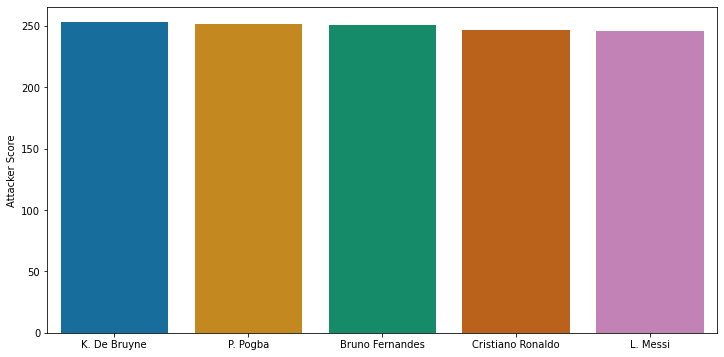

In [48]:
# Forwards - assign a weight to each required skill for each player, and plot it
# Weights
a = 1

fifa_male['ST'] = (fifa_male.Composure * a + fifa_male.Skill * a + fifa_male.Sprint_Speed * a + fifa_male.Vision * a + fifa_male.Mentality * a + fifa_male.Power * a)/((6*a))

# Plot and sequential data generation
plt.figure(figsize = (12,6))
sd = fifa_male.sort_values('ST', ascending = False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['ST']))

sns.barplot(x1, y1, palette = 'colorblind')
plt.ylabel("Attacker Score")
plt.show() # So, the best Overall Striker for 2021 FIFA is K. de Bruyne

In [11]:
fifa_Germany = fifa_male.loc[(fifa_male['Nationality'] ==  'Germany')]
fifa_Germany

ID                   Name  Age  OVA Nationality  \
5          61             D. Odonkor   27   66     Germany   
14        488                O. Kahn   38   87     Germany   
15        496              D. Hamann   36   61     Germany   
19        805             J. Lehmann   39   79     Germany   
43       2196        R. Weidenfeller   36   75     Germany   
55       3647             M. Ballack   34   80     Germany   
57       3922           B. Schneider   34   80     Germany   
108     11125             G. Asamoah   33   66     Germany   
109     11141               M. Klose   37   79     Germany   
116     12695           A. Friedrich   33   74     Germany   
198     45609            D. Bierofka   34   64     Germany   
215     49012             K. Kurányi   33   74     Germany   
245     52270          H. Westermann   33   71     Germany   
253     53009               B. Lauth   31   69     Germany   
254     53012               T. Wiese   33   68     Germany   
268     53612         P. Mertesacker   32   80     Germany   
287    101317           M. Ratajczak   38   63     Germany   
298    104900              M. Gurski   41   59     Germany   
327    111206             S. Riether   35   69     Germany   
360    121134               A. Walke   37   71     Germany   
361    121170               A. Meier   36   70     Germany   
362    121185              C. Schulz   34   68     Germany   
364    121933               R. Adler   33   78     Germany   
365    121937             M. Rensing   35   70     Germany   
366    121939                P. Lahm   32   88     Germany   
367    121944      B. Schweinsteiger   34   75     Germany   
368    122066               R. König   37   63     Germany   
421    137262            S. Kießling   33   75     Germany   
422    137351               D. Baier   35   77     Germany   
433    137785                R. Huth   32   74     Germany   
616    150418               M. Gómez   33   74     Germany   
618    150516            L. Podolski   35   75     Germany   
620    150532                P. Ochs   30   74     Germany   
674    155408             M. Schäfer   32   76     Germany   
710    156437              P. Pentke   35   73     Germany   
739    157528         M. Stoppelkamp   33   69     Germany   
744    157703           U. Hünemeier   34   68     Germany   
746    157716                M. Russ   33   72     Germany   
755    158138                A. Hunt   33   73     Germany   
767    158394             K. Reichel   33   69     Germany   
773    158777           P. Tschauner   34   72     Germany   
779    158856             C. Gentner   34   74     Germany   
837    162223          A. Baumjohann   33   69     Germany   
923    164491                D. Aogo   32   73     Germany   
929    164633            T. Hoogland   34   70     Germany   
998    166928       A. Bellinghausen   34   66     Germany   
1006   167431              G. Castro   33   73     Germany   
1008   167437         D. Stroh-Engel   34   64     Germany   
1009   167452                O. Fink   37   72     Germany   
1010   167495               M. Neuer   34   89     Germany   
1136   170159            F. Bastians   32   74     Germany   
1138   170231             M. Compper   34   64     Germany   
1332   175962             N. Bungert   31   73     Germany   
1333   175964                 S. Dum   28   62     Germany   
1334   175996              D. Halfar   29   70     Germany   
1380   176635                M. Özil   31   82     Germany   
1383   176687                A. Beck   33   70     Germany   
1392   176790              S. Aigner   32   69     Germany   
1415   177105               P. Ebert   32   69     Germany   
1416   177107              R. Müller   33   63     Germany   
1423   177156            N. Feldhahn   33   62     Germany   
1446   177457              L. Bender   31   82     Germany   
1447   177458              S. Bender   31   81     Germany   
1450   177488              M. Konrad   32  